In [1]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [2]:
import pandas as pd
import io

# read csv
train_df = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))

# safety: limit number of rows to display
pd.set_option("display.max_rows", 10)

# look at data
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


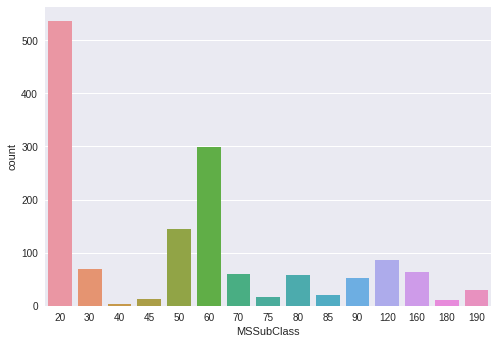

In [4]:
# pandas bar chart becomes a seaborn countplot.
import seaborn as sns
sns.countplot(train_df['MSSubClass'])

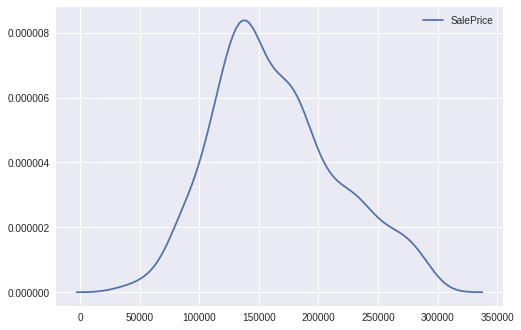

In [7]:
# KDE, short for "kernel density estimate"
#  it will buff out outlier or "in-betweener" values which would cause a line chart to suddenly dip
sns.kdeplot(train_df.query('SalePrice < 300000').SalePrice)

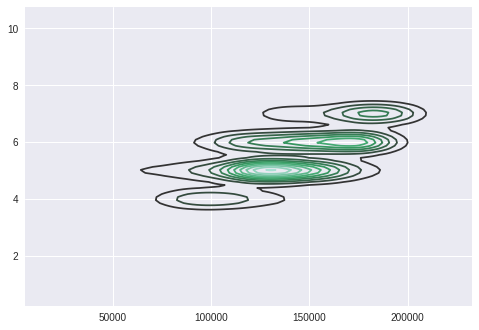

In [8]:
# Bivariate KDE plots like this one are a great alternative to scatter plots and hex plots.
# Warning: computationally intensive
sns.kdeplot(train_df[train_df['SalePrice'] < 200000].loc[:, ['SalePrice', 'OverallQual']].dropna().sample(300))